In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import scipy.signal as signal

from numpy.fft import fft, ifft
from numpy import e, pi, cos

plt.rcParams.update({"axes.grid": True})

### Questão 1

In [2]:
n = np.arange(0, 8)  # Gera um vetor de 0 a 7

x1_n = [0, 1, 2, 3, 2, 1, 0, 0]  # Definição de x1[n]
x2_n = [2, 1, 0, 0, 0, 1, 2, 3]  # Definição de x2[n]

X1_k = fft(x1_n) * (
    e ** (-1j * 2 * pi / 8 * 4 * n)
)  # Calcula a FFT de x1[n] e realiza deslocamento de 4

x2_hat_n = ifft(X1_k)  # Calcula a IFFT

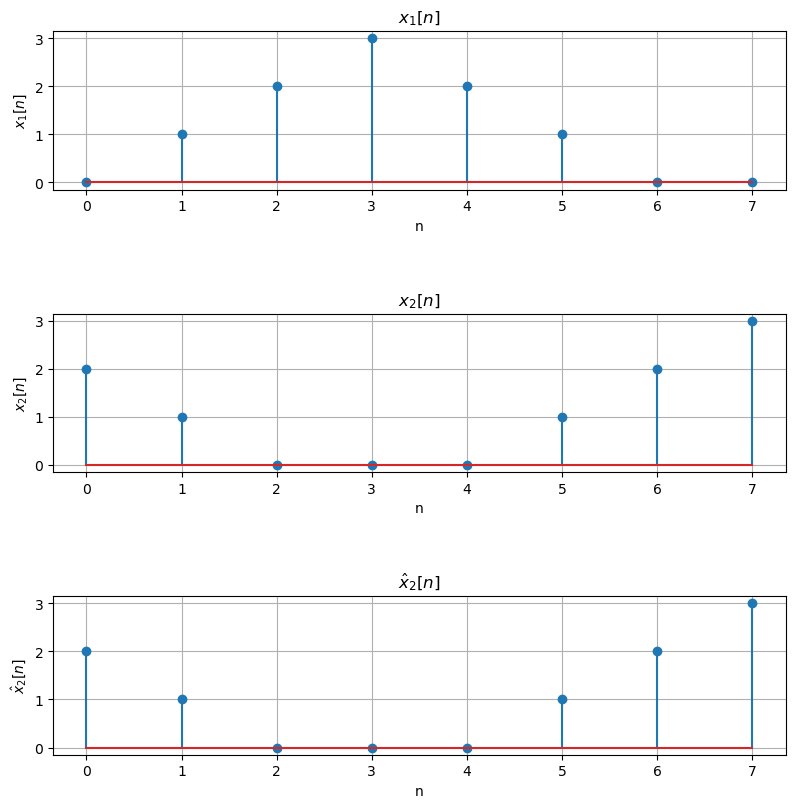

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(9, 9))

ax[0].stem(n, np.real(x1_n))
ax[0].set_title("$x_1[n]$")
ax[0].set_xlabel("n")
ax[0].set_ylabel("$x_1[n]$")
ax[0].yticks = np.arange(-1, 4, 1)

ax[1].stem(n, np.real(x2_n))
ax[1].set_title("$x_2[n]$")
ax[1].set_xlabel("n")
ax[1].set_ylabel("$x_2[n]$")
ax[1].yticks = np.arange(-1, 4, 1)

ax[2].stem(n, np.real(x2_hat_n))
ax[2].set_title("$\hat{x}_2[n]$")
ax[2].set_xlabel("n")
ax[2].set_ylabel("$\hat{x}_2[n]$")
ax[2].yticks = np.arange(-1, 4, 1)

plt.tight_layout(pad=4.0)
plt.show()

### Questão 2 item `c`

In [4]:
N = 4
n = np.arange(0, N)

x_n = cos(pi * n / 2)
h_n = 2**n

y_n = ndimage.convolve(x_n, h_n, mode="wrap", origin=-int(N / 2))

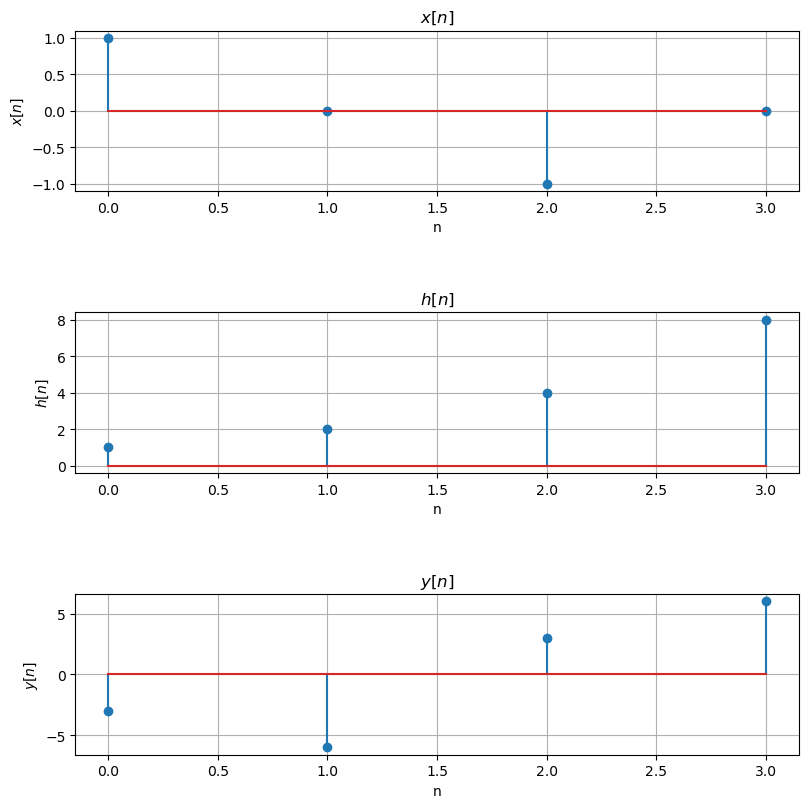

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(9, 9))

ax[0].stem(n, x_n)
ax[0].set_title("$x[n]$")
ax[0].set_xlabel("n")
ax[0].set_ylabel("$x[n]$")
ax[0].yticks = np.arange(-1, 4, 1)

ax[1].stem(n, h_n)
ax[1].set_title("$h[n]$")
ax[1].set_xlabel("n")
ax[1].set_ylabel("$h[n]$")
ax[1].yticks = np.arange(-1, 4, 1)

ax[2].stem(n, y_n)
ax[2].set_title("$y[n]$")
ax[2].set_xlabel("n")
ax[2].set_ylabel("$y[n]$")
ax[2].yticks = np.arange(-1, 4, 1)

plt.tight_layout(pad=4.0)
plt.show()

In [6]:
N = 4
n = np.arange(0, N)

x_n = cos(pi * n / 2)
h_n = 2**n

X_k = fft(x_n)
H_k = fft(h_n)

Y_k = X_k * H_k

y_n = ifft(Y_k)

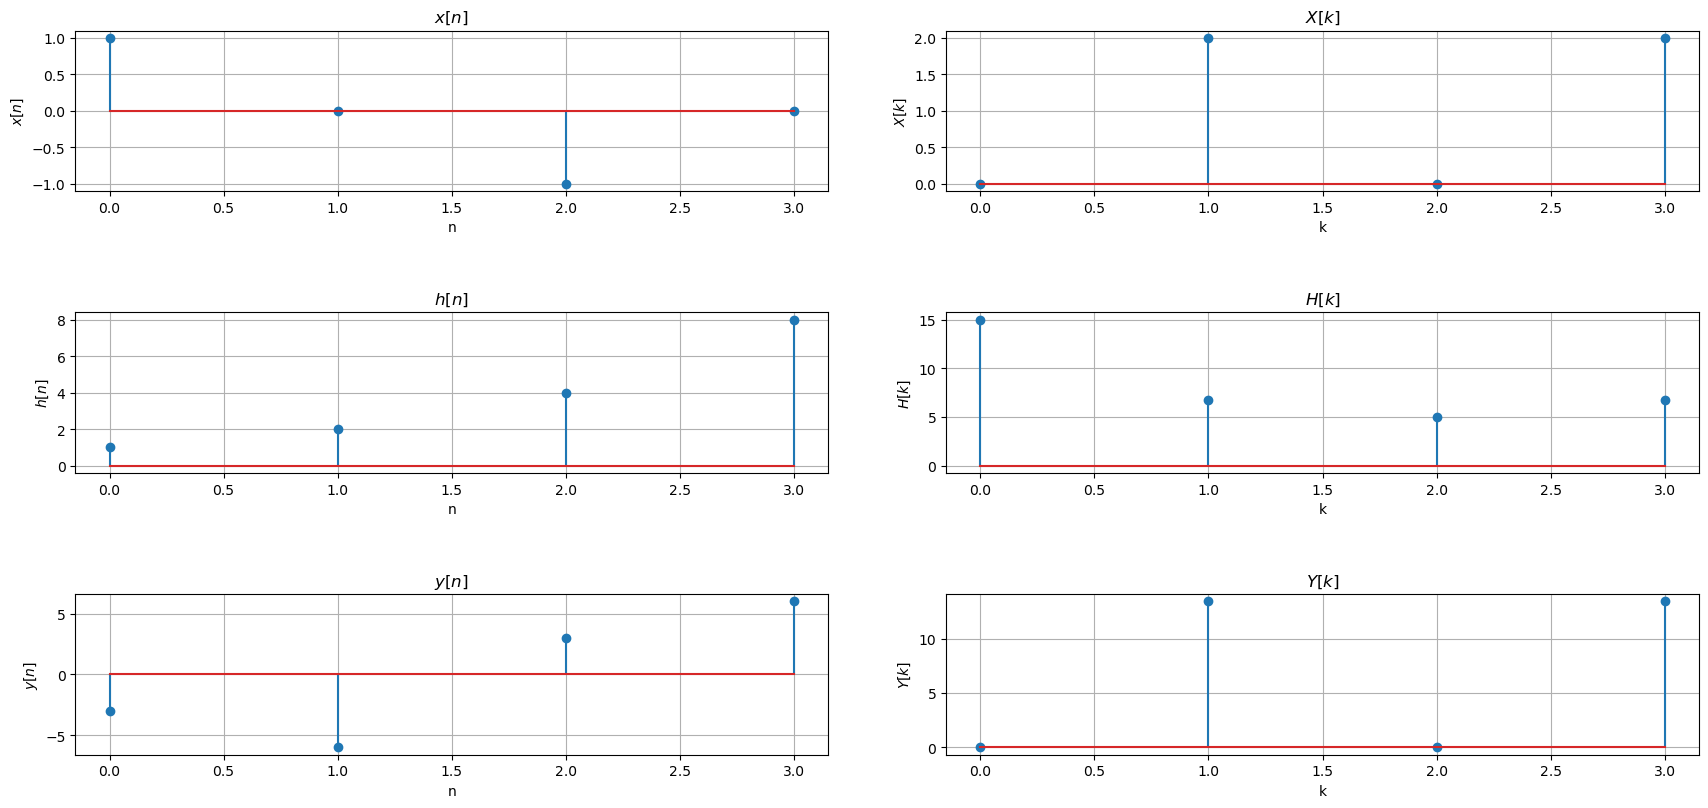

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(18, 9))

ax[0, 0].stem(n, x_n)
ax[0, 0].set_title("$x[n]$")
ax[0, 0].set_xlabel("n")
ax[0, 0].set_ylabel("$x[n]$")
ax[0, 0].yticks = np.arange(-1, 4, 1)

ax[0, 1].stem(n, np.abs(X_k))
ax[0, 1].set_title("$X[k]$")
ax[0, 1].set_xlabel("k")
ax[0, 1].set_ylabel("$X[k]$")
ax[0, 1].yticks = np.arange(-1, 4, 1)

ax[1, 0].stem(n, h_n)
ax[1, 0].set_title("$h[n]$")
ax[1, 0].set_xlabel("n")
ax[1, 0].set_ylabel("$h[n]$")
ax[1, 0].yticks = np.arange(-1, 4, 1)

ax[1, 1].stem(n, np.abs(H_k))
ax[1, 1].set_title("$H[k]$")
ax[1, 1].set_xlabel("k")
ax[1, 1].set_ylabel("$H[k]$")
ax[1, 1].yticks = np.arange(-1, 4, 1)

ax[2, 0].stem(n, np.real(y_n))
ax[2, 0].set_title("$y[n]$")
ax[2, 0].set_xlabel("n")
ax[2, 0].set_ylabel("$y[n]$")
ax[2, 0].yticks = np.arange(-1, 4, 1)

ax[2, 1].stem(n, np.abs(Y_k))
ax[2, 1].set_title("$Y[k]$")
ax[2, 1].set_xlabel("k")
ax[2, 1].set_ylabel("$Y[k]$")
ax[2, 1].yticks = np.arange(-1, 4, 1)

plt.tight_layout(pad=4.0)
plt.show()

### Questão 3

In [8]:
N = 8
n = np.arange(0, N)

x1_n = [1, 2, 1, 1, 2, 1, 1, 2]
x2_n = [0, 1, 3, 2, 0, 0, 0, 0]

x3_n = ndimage.convolve(x1_n, x2_n, mode="wrap", origin=-int(N / 2))

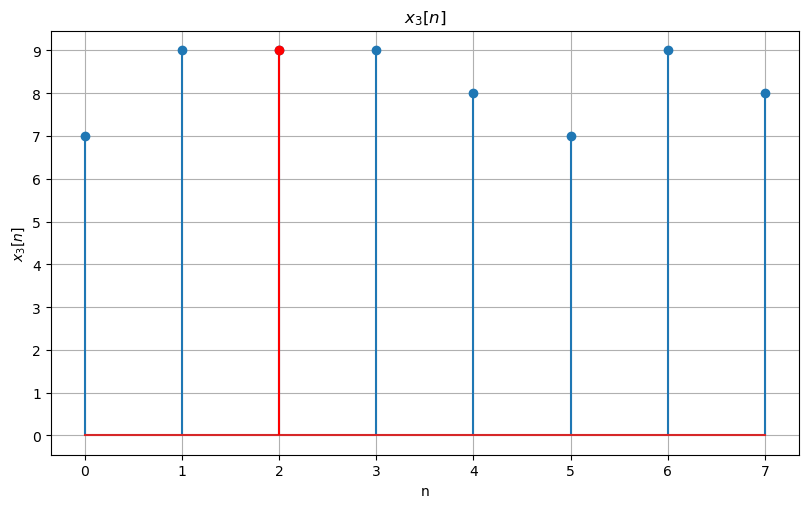

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.stem(n, x3_n)
ax.set_title("$x_3[n]$")
ax.set_xlabel("n")
ax.set_ylabel("$x_3[n]$")
ax.set_yticks(np.arange(-1, 10, 1))

ax.stem(2, x3_n[2], "r")

plt.tight_layout(pad=4.0)
plt.show()

### Questão 5

In [10]:
N = 9
n = np.arange(0, N)

x1_n = [1, -2, -1, 3, 0, 0, 0, 0, 0]
x2_n = [0, 2, 0, 0, -1, 1, 0, 0, 0]

circ_conv = ndimage.convolve(x1_n, x2_n, mode="wrap", origin=-int(N / 2))
linear_conv = ndimage.convolve(x1_n, x2_n, mode="constant", origin=-int(N / 2))

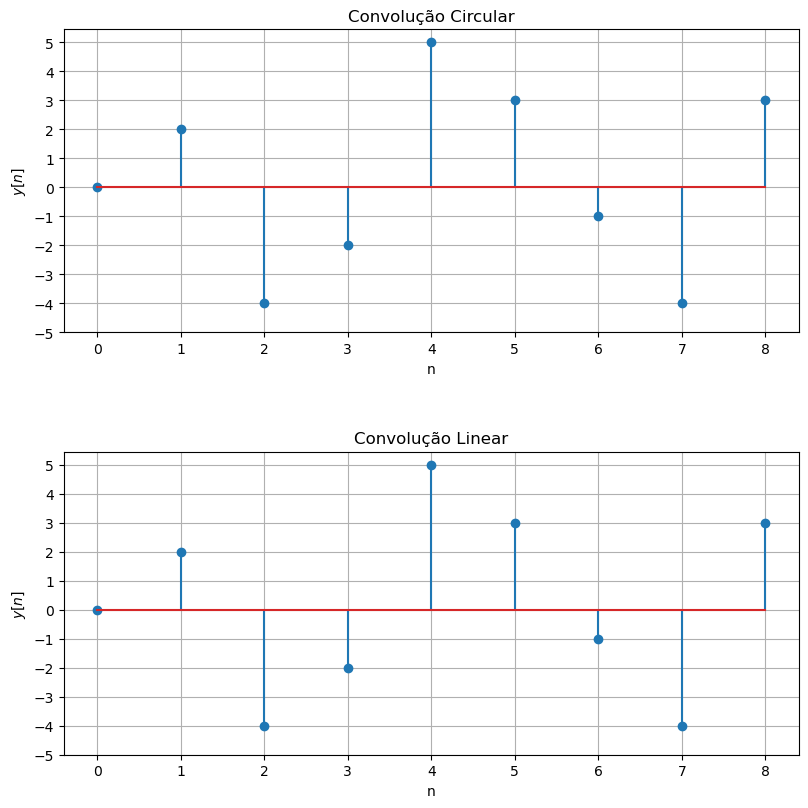

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(9, 9))

axs[0].stem(n, circ_conv)
axs[0].set_title("Convolução Circular")
axs[0].set_xlabel("n")
axs[0].set_ylabel("$y[n]$")
axs[0].set_yticks(np.arange(-5, 6, 1))

axs[1].stem(n, linear_conv)
axs[1].set_title("Convolução Linear")
axs[1].set_xlabel("n")
axs[1].set_ylabel("$y[n]$")
axs[1].set_yticks(np.arange(-5, 6, 1))

plt.tight_layout(pad=4.0)
plt.show()